In [1]:
import pymc3 as pm
import numpy as np

In [2]:
numvar = 8
T = np.zeros(numvar)
T[1], T[3], T[5] = [1.]*3
print(T)

# Generate Sample data
N = 30

X = [None for i in range(numvar)]
for i in range(numvar):
    X[i] = np.random.binomial(1, 0.50, N)

# Output Y will depend only on X1 and X2
# parameters teta1 and teta2 are set to 0.75
prod = 1
for i in range(numvar):
    prod *= (1 - T[i]*X[i])
P = 1 - prod
Y = np.random.binomial(1, P)

[ 0.  1.  0.  1.  0.  1.  0.  0.]


In [3]:
model = pm.Model()

with model:
    
    t = [None for i in range(numvar)]
    for i in range(numvar):
        t[i] = pm.Beta('t%02d'%i, alpha=0.2, beta=0.2)
        #t[i] = pm.Uniform('t%02d'%i)

    prod = 1
    for i in range(numvar):
        prod *= (1 - t[i])**(X[i])

    p = 1 - prod

    D = pm.Bernoulli('D', p=p, observed=Y)
    

In [4]:
#map_estimate = pm.find_MAP(model=model)
#map_estimate

In [5]:
with model:
    # draw posterior samples
    #step = pm.Metropolis()
    step = pm.NUTS()
    trace = pm.sample(tune=1000, draws=1000, step=step, chains=2, njobs=1)#, nuts_kwargs=dict(target_accept=0.8))
    #trace = pm.sample(2000, step=step, start=start, njobs=1, random_seed=123)


Sequential sampling (2 chains in 1 job)
NUTS: [t07_logodds__, t06_logodds__, t05_logodds__, t04_logodds__, t03_logodds__, t02_logodds__, t01_logodds__, t00_logodds__]
100%|██████████| 2000/2000 [00:06<00:00, 331.92it/s]
There were 107 divergences after tuning. Increase `target_accept` or reparameterize.
There were 243 divergences after tuning. Increase `target_accept` or reparameterize.


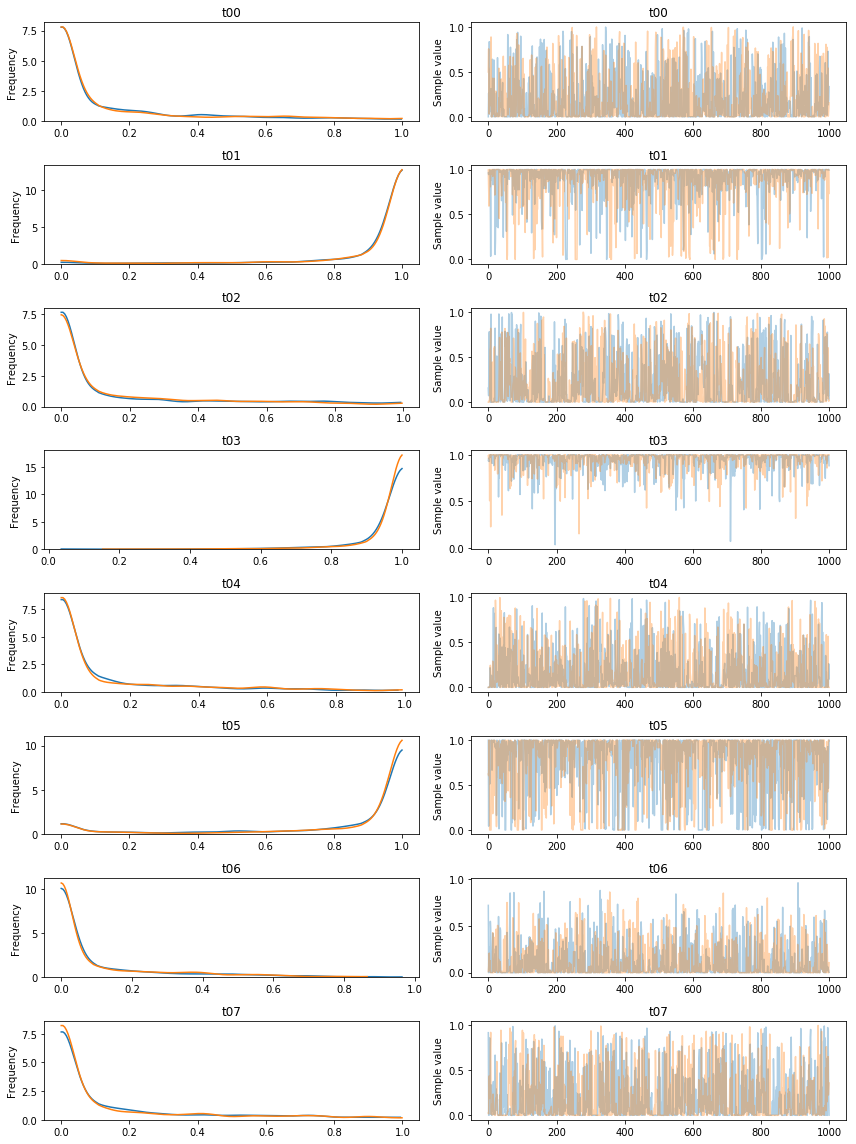

In [6]:
plots = pm.traceplot(trace)

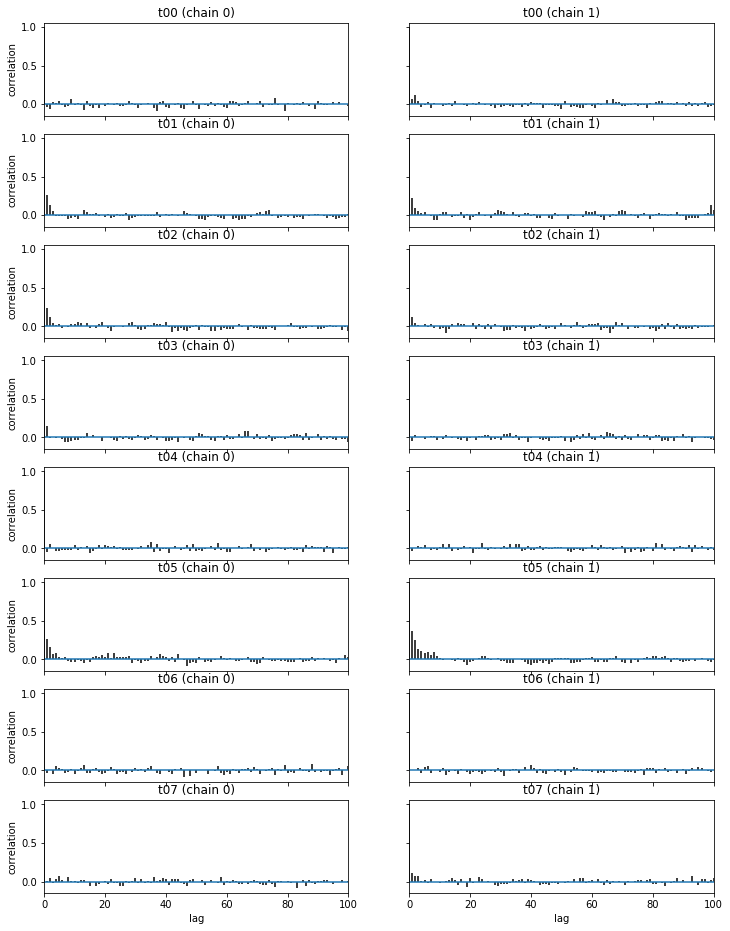

In [7]:
plots = pm.autocorrplot(trace)

In [8]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
t00,0.182874,0.259247,0.006548,7.333333e-18,0.782351,1691.546162,0.999568
t01,0.886308,0.220855,0.006156,3.119756e-01,1.000000,1046.930928,1.001323
t02,0.202662,0.274804,0.007345,3.581037e-17,0.813821,1153.934464,0.999778
t03,0.949541,0.102165,0.002282,7.416793e-01,1.000000,1753.728129,1.000526
t04,0.156783,0.234810,0.005495,3.090911e-15,0.707217,1971.379011,0.999904
t05,0.768920,0.332834,0.012380,1.596312e-03,1.000000,696.805355,1.000407
t06,0.105184,0.175421,0.003819,1.194848e-17,0.525215,2061.485318,0.999512
t07,0.181828,0.260023,0.007251,6.500111e-15,0.772134,1352.398675,0.999615


In [9]:
pm.effective_n(trace)

{'t00': 1691.5461616259897,
 't01': 1046.930927807352,
 't02': 1153.9344637217848,
 't03': 1753.7281285956067,
 't04': 1971.3790109146923,
 't05': 696.80535461589568,
 't06': 2061.4853177177001,
 't07': 1352.3986747445388}

In [10]:
pm.stats.hpd(trace, alpha=0.05)

{0: {'t00': array([  7.33333316e-18,   7.82351485e-01]),
  't00_logodds__': array([-15.31233191,   3.19935683]),
  't01': array([ 0.4007701 ,  0.99999999]),
  't01_logodds__': array([ -1.3581459 ,  15.20452717]),
  't02': array([  2.77048460e-15,   8.34393866e-01]),
  't02_logodds__': array([-16.1090069 ,   3.77755034]),
  't03': array([ 0.7286759 ,  0.99999998]),
  't03_logodds__': array([  0.19288585,  12.60347645]),
  't04': array([  7.98477245e-13,   6.96502235e-01]),
  't04_logodds__': array([-15.28577143,   2.22559361]),
  't05': array([ 0.00253694,  0.99999999]),
  't05_logodds__': array([ -8.19330062,  15.2239644 ]),
  't06': array([  6.58889350e-14,   5.33148335e-01]),
  't06_logodds__': array([-16.36573212,   1.16222378]),
  't07': array([  6.50011101e-15,   7.69743935e-01]),
  't07_logodds__': array([-16.19881951,   2.65303062])},
 1: {'t00': array([  6.81365848e-13,   7.94659837e-01]),
  't00_logodds__': array([-16.57675811,   2.52812498]),
  't01': array([ 0.21612627,  0.9